# <h1><center>PIMA Diabetes - Naive Bayes Classification Algorithm</center></h1>

<center><img src="diabetes.jpg" width="500" height="500"></center>

## <center>By : Nitika</center>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import classification_report

#from scipy.stats import chi2_contingency
#from scipy.stats import chi2
#from sklearn.feature_selection import chi2 as sklearn_chi2

# File loading

In [5]:
diabetes_data="diabetes.csv"

#load data using panda's read_csv function
diabetes_df = pd.read_csv(diabetes_data)


#list the dataset
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
## gives information about the data types,columns, null value counts, memory usage etc
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


  ### We can observe that the data set contain 768 rows and 9 columns. ‘Outcome’ is the column which we are going to predict, which says if the patient is diabetic or not. 1 means the person is diabetic and 0 means a person is not

In [7]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


    describe() : generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.

    the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns

## So let us check how many people have diabetes and how many of them do not!

In [8]:
diabetes_df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

Text(0, 0.5, 'Number of People')

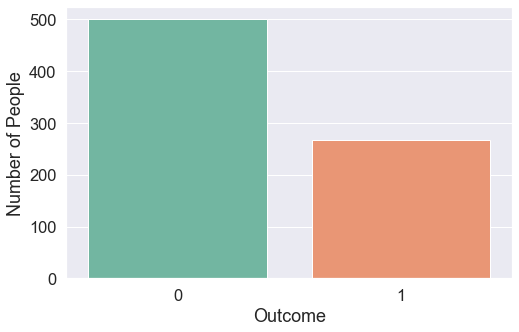

In [26]:
## checking the balance of the data by plotting the count of outcomes by their value
plt.figure(figsize=(8,5))
sns.set(font_scale = 1.5)
sns.countplot(x = 'Outcome', data=diabetes_df, palette="Set2")
plt.ylabel('Number of People')

    We can see from above plot that:

    People who do not have diabetes: 500

    People who have diabetes : 268
    
    The above graph also shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

# EDA and Statistical Analysis

   ### lets check for the missing values 

In [27]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

    We can observe that there are no data points missing in the data set. If there were any, we should deal with them accordingly.

    But in describe() we notice that Glucose, BloodPressure, skinThickness, Insulin and BMI have minimum value as 0(zero) which doesn't make any sense
    
    So its better to replaces zero with NaN and after that counting them would be eaiser and zero need to be replacced with suitable values

In [28]:
diabetes_df_copy = diabetes_df.copy(deep = True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

## showing the count of Nans
print(diabetes_df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


   ### Visualization for understanding and analysing the distribution of data for different variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11dca1460>,
      dtype=object)

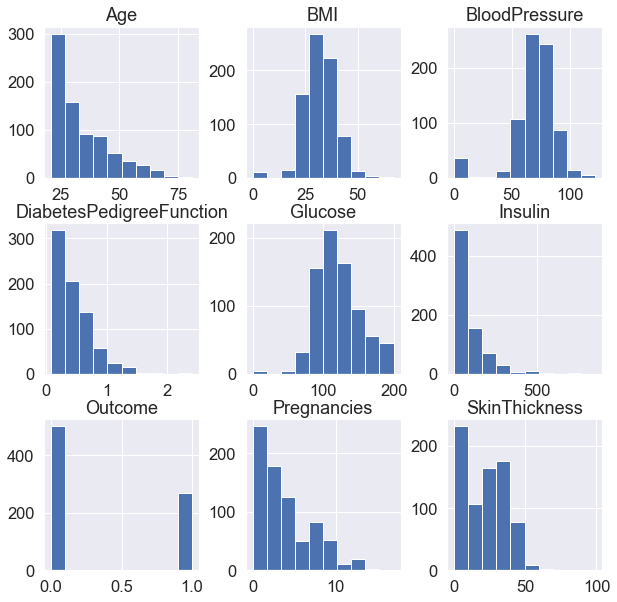

In [29]:
diabetes_df.hist(figsize = (10,10))

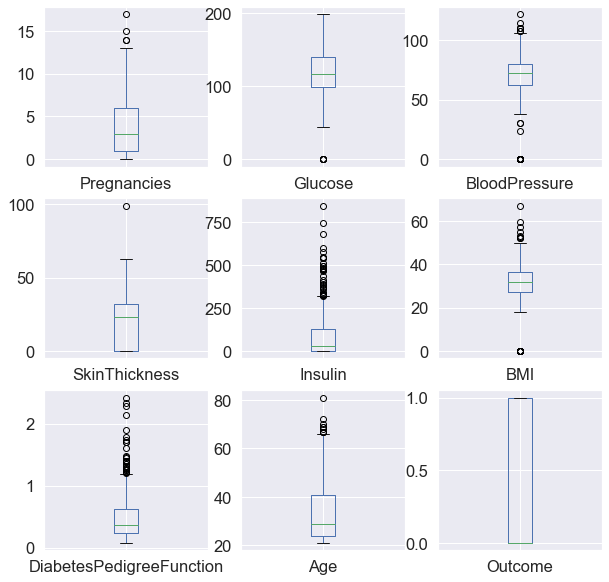

In [31]:
diabetes_df.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))
sns.set(font_scale = 1.5)

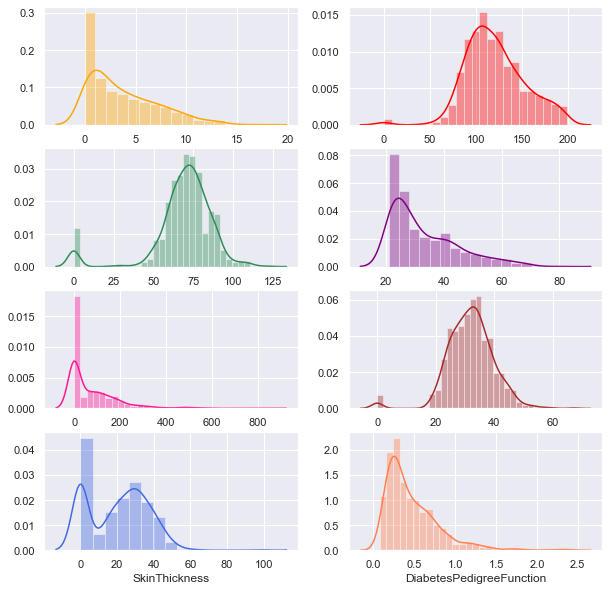

In [33]:
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.set(font_scale = 1)
sns.distplot(diabetes_df.Pregnancies, ax = ax[0,0], color = 'orange')
sns.distplot(diabetes_df.Glucose, ax = ax[0,1], color = 'red')
sns.distplot(diabetes_df.BloodPressure, ax = ax[1,0], color = 'seagreen')
sns.distplot(diabetes_df.Age, ax = ax[1,1], color = 'purple')
sns.distplot(diabetes_df.Insulin, ax = ax[2,0], color = 'deeppink')
sns.distplot(diabetes_df.BMI, ax = ax[2,1], color = 'brown')
sns.distplot(diabetes_df.SkinThickness, ax = ax[3,0], color = 'royalblue')
sns.distplot(diabetes_df.DiabetesPedigreeFunction, ax = ax[3,1], color = 'coral')

  # From all the above visulaisation : 
    
    Histogram : 
    Variables Age, DiabetesPedigreeFunction, Pregnancies, SkinThickness, Insulin are all right skewed that is:

    Mean > Median
    
    Also, From boxplot it looks like
    -> variable Glucose has one outlier
    -> varibale BloodPressure has very few outliers
    -> varibale SkinThickness  has 227 zero invalid values that is why lower limit and Q1 (25th) quartile are same
    -> variable Insulin has 374 zero invalid values that is why lower limit and Q1 (25th) quartile are same, Also there are many outliers


 
    Variables Glucose and BloodPressure do not have much outliers and we need to fill little data so we will use mean here

    Variables SkinThickness, Insulin, and BMI  have much disparity and we need to fill more data so we will use median here
    
### So we impute nan values for the columns in accordance with above analysis

In [34]:
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(), inplace = True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(), inplace = True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(), inplace = True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(), inplace = True)
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace = True)

In [35]:
print(diabetes_df_copy.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


    So , now our data is prepared , there are no null values , no zero values in our dataset

# VISUALIZATION - after Data Cleaning

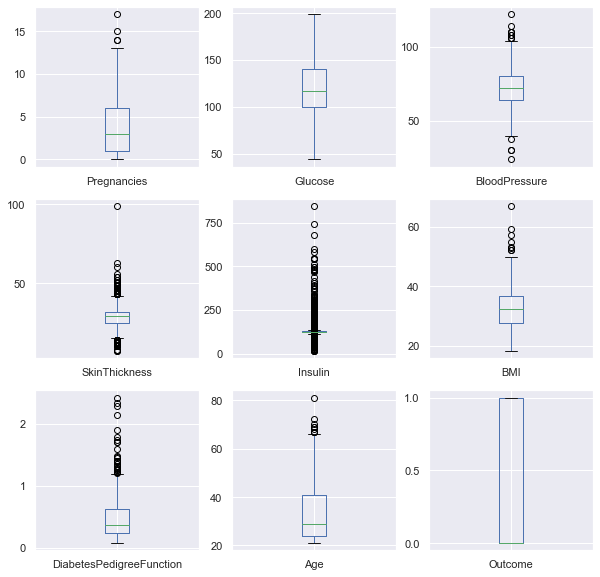

In [36]:
diabetes_df_copy.plot(kind= 'box' , subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(10,10))
sns.set(font_scale = 1.5)

# Correlation Matrix : Heatmap

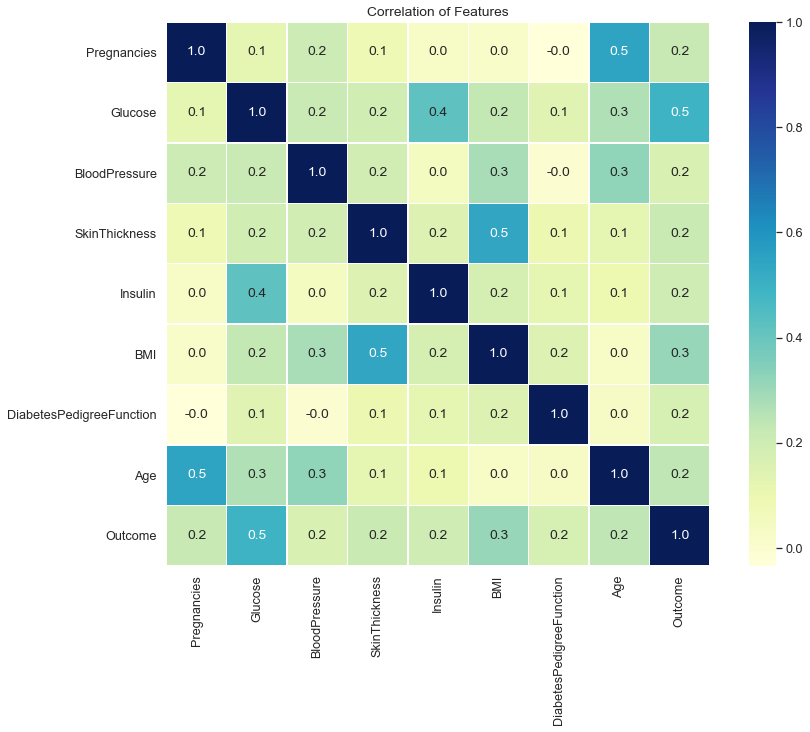

In [37]:
sns.set(font_scale = 1.15)
plt.figure(figsize = (14, 10))

sns.heatmap(diabetes_df_copy.corr(), vmax = 1, linewidths = 0.5, fmt= '.1f',
            square = True, annot = True, cmap = 'YlGnBu', linecolor = "white")
plt.title('Correlation of Features');

### We observe that:
    

    There is no feature variable that has strong correlation with target Outcome as there is no +0.70 which indicates a strong uphill (positive) linear relationship

    Best predictor of target variable Outcome  is Glucose --> 0.5 which is near to 0.50 which indicates a moderate uphill (positive) relationship

    Second best predictor of target variable Outcome is  BMI --> 0.3 which indicates a weak uphill (positive) linear relationship

    Correlation between  BMI and SkinThickness is 0.5 which indicates BMI increases with increase in Skin Thickness

    Correlation between Age and Pregnancies is 0.5 which indicates increase in age increases chances of having a child

    All the variables look to be uncorrelated. So we cannot eliminate any variable just by looking at the correlation matrix

# Naive Bayes Algorithm

### Naive Bayes classifiers are a  simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features.

    * Based on prior knowledge of conditions that may be related to an event, Bayes theorem describes the probability of the event
    * conditional probability can be found this way
    * Assume we have a Hypothesis(H) and evidence(E),According to Bayes theorem, the relationship between the probability of Hypothesis before getting the evidence represented as P(H) and the probability of the hypothesis after getting the evidence represented as P(H|E) is:
    
                    P(H|E) = P(E|H)*P(H)/P(E)
        Prior probability = P(H) is the probability before getting the evidence
        Posterior probability = P(H|E) is the probability after getting evidence

    In general,
    P(class|data) = (P(data|class) * P(class)) / P(data)
    
    Naive Bayes is a simple technique for constructing classifiers: models that assign class labels to problem instances, represented as vectors of feature values, where the class labels are drawn from some finite set

### 1) So lets applied Naive Bayes classification algorithm to predict whether or not the patients in the dataset have diabetes or not. To evaluate the model we used accuracy and classification report generated using sklearn.

    We need to separate the columns into dependent (Outcome or label data ) and independent variables ( Eight features). X contains independent variable and y contains dependent variable. 
    
    Then we will split these variables into train and test set. 


In [49]:
X = diabetes_df_copy.drop('Outcome', axis  = 1)
y = diabetes_df_copy['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [50]:
print(X_train.shape)
print(X_test.shape)
print(y_train.size)
print(y_test.size)

(537, 8)
(231, 8)
537
231


    After splitting data into training and testing, we will generate a Naive Bayes model on the training set and perform prediction on the test datasets.


In [51]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [52]:
nb_y_pred = nb_model.predict(X_test)

 #### Now we will evaluate the model's accuracy

    A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

In [53]:
nbConfusion = metrics.confusion_matrix(y_test, nb_y_pred)
nbConfusion

array([[124,  26],
       [ 34,  47]])

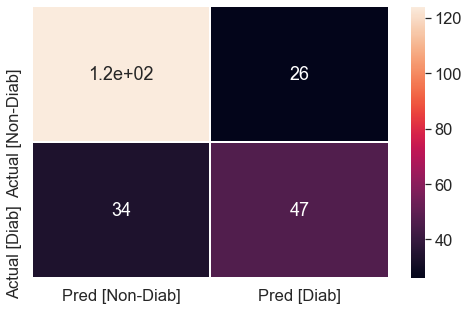

In [54]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(8,5))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

    

    So here:

    TN(True-Negative) = 124 ---> person did not have diabetes and predicted non- diabetic

    TP(True-Poisitve) = 47  ---> person has diabetes and predicted diabetes

    FN (False-Negative) = 34 ---> person had diabetes but predicted non-diabetic

    FP(False-Positive) = 26 ---> person did not have diabetes but predicted diabetes

     => confusion matrix: 0 = No Diabetes; 1 = Diabetes 



####     So, how often is the classifier correct? , let's look into the accuracy score ->

In [55]:
print('Accuracy of Naive Bayes Classifier is: ', nb_model.score(X_test,y_test) * 100,'%')

Accuracy of Naive Bayes Classifier is:  74.02597402597402 %


In [56]:
print(classification_report(y_test, nb_y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81       150
           1       0.64      0.58      0.61        81

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



    Precsion tells us about when model predicts yes, how often is it correct , which we can see is 64%
    
    So when our model predict 1 and actual it is 1 then it's precision is 64%. It should be high as possible.

    Also, When the actual value is positive, how often is the prediction correct!! , we an see it is 58%

    F1 score conveys the balance between the precision and the recall.  which we can see is 81 % for non Dibetic and 61 % for Diabetic

    So the overall accuracy is 74% which means that there is 74% chance that model will be able to distinguish between Diabetic class and Non-Diabetic class.

# 2) Next we see how much BMI , Insulin , Age  Impact the output variable - 'Outcome'

In [57]:
df = diabetes_df_copy[['BMI', 'Insulin', 'Age', 'Outcome']]
df

,BMI,Insulin,Age,Outcome
0,33.6,125.0,50,1
1,26.6,125.0,31,0
2,23.3,125.0,32,1
3,28.1,94.0,21,0
4,43.1,168.0,33,1
...,...,...,...,...
763,32.9,180.0,63,0
764,36.8,125.0,27,0
765,26.2,112.0,30,0
766,30.1,125.0,47,1


In [58]:
X_2 = df.drop('Outcome', axis  = 1)
y_2 = df['Outcome']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size = 0.30, random_state = 17)

In [59]:
print(X_train_2.shape)
print(X_test_2.shape)
print(y_train_2.size)
print(y_test_2.size)

(537, 3)
(231, 3)
537
231


In [60]:
nb_model_2 = GaussianNB()
nb_model_2.fit(X_train_2, y_train_2)

GaussianNB()

In [61]:
nb_y_pred_2 = nb_model_2.predict(X_test_2)

 #### N again ow we will evaluate the model's accuracy -

In [62]:
nbConfusion_2 = metrics.confusion_matrix(y_test_2, nb_y_pred_2)
nbConfusion_2

array([[138,  12],
       [ 62,  19]])

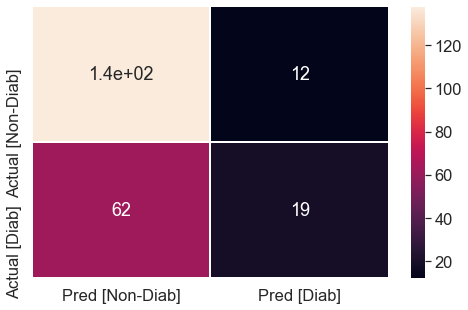

In [63]:
ylabel = ["Actual [Non-Diab]","Actual [Diab]"]
xlabel = ["Pred [Non-Diab]","Pred [Diab]"]
#sns.set(font_scale = 1.5)
plt.figure(figsize=(8,5))
sns.heatmap(nbConfusion_2, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

    TN(True-Negative) = 138 ---> person did not have diabetes and predicted non- diabetic

    TP(True-Poisitve) = 19  ---> person has diabetes and predicted diabetes

    FN (False-Negative) = 62 ---> person had diabetes but predicted non-diabetic

    FP(False-Positive) = 12 ---> person did not have diabetes but predicted diabetes


In [65]:
print('Accuracy of Naive Bayes Classifier is: ', nb_model_2.score(X_test_2,y_test_2) * 100,'%')

Accuracy of Naive Bayes Classifier is:  67.96536796536796 %


In [66]:
print(classification_report(y_test_2, nb_y_pred_2))

              precision    recall  f1-score   support

           0       0.69      0.92      0.79       150
           1       0.61      0.23      0.34        81

    accuracy                           0.68       231
   macro avg       0.65      0.58      0.56       231
weighted avg       0.66      0.68      0.63       231



    So the overall accuracy is 68% which means that there is 68% chance that model will be able to show how much the Outcome variable is affected by BMI, Insulin and Age.



# Conclusion
    So , we have applied Naive Bayes classification algorithm to predict whether or not the patients in the dataset have diabetes or not and the Effect of few feature (Age, Insulin and BMI) on Outcome variable. And we see that , we cannot ignore other feature as the accuracy score with selected feature is less as compared to accuracy score of all feature.
    
    To evaluate the model we have used accuracy and classification report generated using sklearn.

# Thank You !